# Phase 3

## 1. Introduction

### Research Question
Inputs: `Applicant Race` (C), `Applicant Sex` (C), `County Code` (C), `Loan Amount` (N), `Applicant Income` (N) \
Outputs: `Action Taken` (C) \
Evaluation Metrics: Recall, Predictive Equality \
\* (C) represents Categorical (Using Label Encoding) and (N) represents Numerical

The inputs we are interested in are `Applicant Race`, `Applicant Sex`, `County Code`, `Loan Amount`, `Applicant Income` because `Applicant Income` and `Loan Amount` are, intuitively, the most applicable to whether a loan gets accepted or not. According to [investopedia](https://www.investopedia.com/articles/mortgages-real-estate/08/mortgage-candidate.asp) [1], credit score, debt, income, and appraisal value have an impact on whether an applicant has successfully gets a mortgage, so we believe that these variables can be the most indicative of these measures. We're including `Applicant Race`, `Applicant Sex` because these factors should not affect whether an applicant gets approved or not (sensitive features).

The main output we want to check is `Action Taken`, because this column indicates whether the loan was approved or not (aka originated). Another potential column of interest is `Denial Reason 1`, `Denial Reason 2`, or `Denial Reason 3` because it could be good supplemental information as to what was faulty about the application, however the denial reason for most applicants will be undefined since most loans in the dataset are approved.

Our main evaluation metric is recall because we believe that telling an applicant that they can't get a loan when they actually can is more detrimental than saying they can when they can't. Although there is the time aspect that goes into applying for a loan, it's better to apply and get rejected than not apply at all, because there is still a chance that the applicant could have gotten funding. However, although we are focusing on recall, we will still check other metrics like precision/F1 to make sure there isn't too much of a skew in the data.

We will also evaluate across the sensitive features for fairness, focusing on predictive equality, but also taking into consideration statistical parity and calibration. We consider predictive equality to be the main focus because we want to ensure that our model isn't unfairly predicting one race/gender/ethnicity would fail to get a loan compared to others.

Overall, the goal of this project is to create a loan approval prediction model that balances fairness and "accuracy" in the form of predictive equality and recall.

### Hypotheses
We predict that white people and males will be the most likely to get approved in our model. This is due to the skew in our data towards a large amount of white people and males. This skew may be due to the makeup of the United States, which is majority white. Conventional loans also appear to be the most general and therefore most common type of loan we would see. By ensuring that our data is even across the different sensitive features, we predict that the model, in turn, will become more fair and representative for each sex, race, and ethnicity.

### Importance
Loans are an important part to financial stability and should be accessible to everyone who deserves it. Our model will provide some insight on the fairness of the loan approval process when it relates to minorities, and the impact of protected traits in the approval process. This relates to algorithmic fairness as our model will be trained to balance fairness and "accuracy" (predictive equality and recall). In theory, a fair model should yield fair results; we want to test if this is true to bring attention to the current state of the loan approval process and raise conversation on the transparency of reasons for denial.


### Related Work
While there aren't any formal and notable works on loan approval, there are papers covering similar topics of the role of protected traits such as gender or race in the context of financial opportunities. For example, the paper [Leveraging Gender Proxies Can Lead to Fairer Credit Risk Predictions](https://papers.ssrn.com/sol3/papers.cfm?abstract_id=4602450) [2] evaluates gender bias in algorithms, using alternative data to evaluate credit risk prediction. Its takeaways include the fact incorporating strong gender proxies into the credit scoring process can potentially reduce the gender gap in credit risk prediction accuracy and credit allocation. This paper lies in the same domain as our project in the sense that they are both discovering ways to increase fairness in models that deal with data amongst different groups of people. Another paper that covers similar themes as our project is [Algorithmic Bias, Financial Inclusion, and Gender](https://www.womensworldbanking.org/wp-content/uploads/2021/02/2021_Algorithmic_Bias_Report.pdf) [3], which explores the use of synthetic data to discover potential areas of gender-based bias in relation to digital credit. This paper discusses different ways to avoid the historical themes of bias in relation to gender when using machine learning and artifiical intelligence. This is similar to our project's goal of discovering potential biases in the current state of the loan approval process and creating a model that is fair and mitigates this discrimination. The reason why no notable loan approval papers exist could be due to the fact that loan approval data is difficult to deal with and not as transparent as credit risk or digital credit. Credit is also something that is applicable to bigger groups of people; more people use credit cards than people that buy houses or run businesses, which is why the call for papers examining fairness for loan approvals is probably lower. Furthermore, loan approval data is also difficult because it is a more tedious task than something like applying for a credit card.

## 2. Datasheet

### Purpose of Dataset
The dataset was created by the Consumer Financial Protection Bureau (CFPB), which is a government entity. The CFPB is tasked with enforcing fair lending laws like the Equal Credit Opportunity Act. The bureau collects mortgage and loan data, so they can monitor for potential discriminatory lending patterns based on factors like race, gender, age, etc. Financial institutions are required by the Home Mortgage Disclosure Act (HMDA) to report lending data to the CFPB.
### Dataset funding
Since the CFPB is a government organization, taxpayers funded for the creation for this dataset.
### Influences in data reporting
The government strictly outlines what values to include in the data. A [reference chart](https://files.consumerfinance.gov/f/documents/cfpb_reportable-hmda-data_regulatory-and-reporting-overview-reference-chart_2023-02.pdf) [4] is given to the employees at financial instutions on which data to report and how to do so. The [implementation and guidelines material](https://www.consumerfinance.gov/rules-policy/regulations/1003/) [5] also explain the different sections of of the HDMA and how to comply with each section. The law says that instiutions must report requests only if preapproval requests are denied, are approved by the financial institution but not accepted by the applicant, or result in the origination of home purchase loans.
### Preprocessing
The CSV file that is released by the CFPB has no preprocessing at all. It is a compiled dataset which consists of all the reports by the financial institutions.
### Involement of People and Knowledge of Data Use
The financial institutions and the government are aware of the data collection and know that the purpose is for auditing and consumer safety. Financial institutions are also required to give privacy notices to their customers that tells them what data is being collected and how it's used. This is because they are obligated to comply with the privacy component of the [Gramm-Leach-Bliley Act](https://www.ftc.gov/business-guidance/resources/how-comply-privacy-consumer-financial-information-rule-gramm-leach-bliley-act#obligations) [6].
### Raw Data Source
The raw data can be found at the [HDMA data](https://www.consumerfinance.gov/data-research/hmda/historic-data/?geo=nationwide&records=all-records&field_descriptions=codes) [7] section of the CFPB website next to the year 2017.

## 3. Cleaned data imports

In [6]:
# Directly import cleaned data 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df_cleaned = pd.read_csv("cleaned_data.csv")

The data cleaning process was done in datacleaning.ipynb. After reading the documentation from the website and scanning the dataset, columns and rows were carefully selected. Columns without an important meaning to our research question, such as `application_date_indicator`, and columns with insufficient information (missing information larger than 30%), were dropped for the conciseness of the dataset. After that, rows with na values were dropped. To compare the gender difference in the data of 2017, non-2017 data and columns where sex != 1 or 2 were dropped. Finally, the cleaned data is saved as "cleaned_data.csv" for analysis.

## 4. Summarize the data

6 figures with 1 table are presented in the section.

In [7]:
df_cleaned.columns
relevent_num = ['applicant_income_000s','loan_amount_000s']
relevant_cat = ['applicant_race_1','applicant_sex', 'action_taken']
race_mapping = {
    1: 'Native American',
    2: 'Asian',
    3: 'Black',
    4: 'Native Hawaiian/Pacific Islander',
    5: 'White',
    6: 'Not Provided',
    7: 'N/A',
    8: 'No co-applicant'
}
sex_mapping = {
    1: 'Male',
    2: 'Female'
}
action_taken_mapping = {
    1: 'Originated',
    2: 'Approved but not accepted',
    3: 'Denied',
    4: 'Withdrawn',
    5: 'Incomplete and Closed',
    6: 'Loan purchased',
    7: 'Preapproval denied',
    8: 'Preapproval request approved but not accepted'
}

df_cleaned['applicant_sex'] = df_cleaned['applicant_sex'].map(sex_mapping)
df_cleaned['applicant_race_1'] = df_cleaned['applicant_race_1'].map(race_mapping)
df_cleaned['action_taken'] = df_cleaned['action_taken'].map(action_taken_mapping)

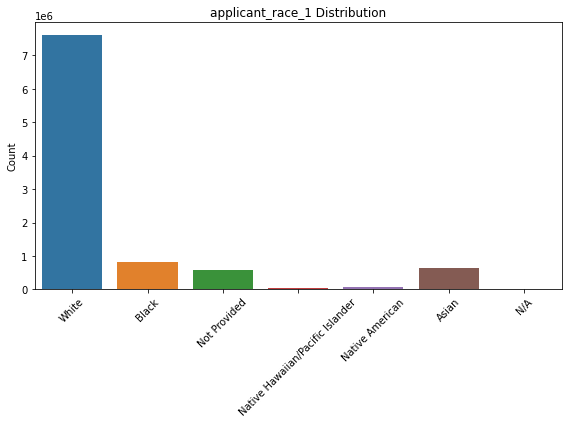

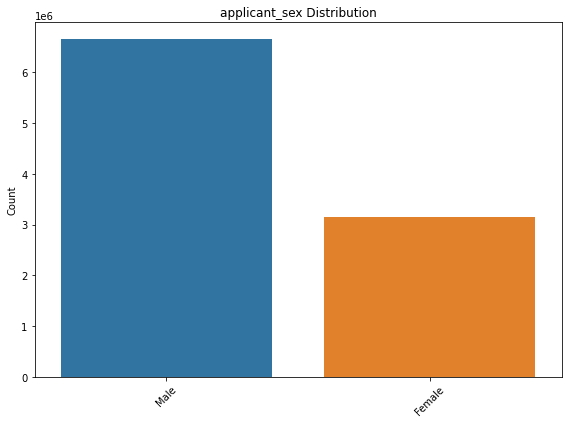

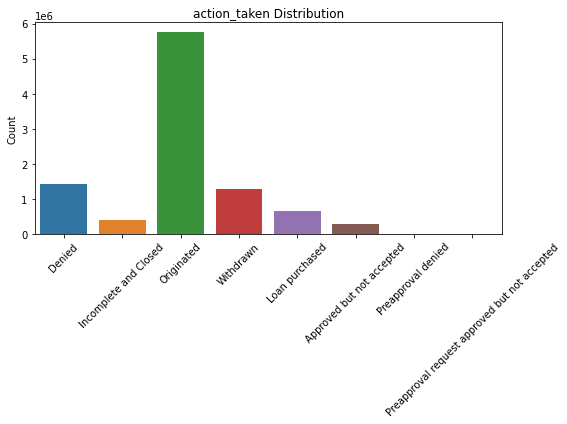

Summary Statistics for Numerical Variables:
       applicant_income_000s  loan_amount_000s
count           9.793702e+06      9.793702e+06
mean            1.119321e+02      2.420835e+02
std             2.301547e+03      5.762923e+02
min             1.000000e+00      1.000000e+00
25%             5.300000e+01      1.200000e+02
50%             8.100000e+01      1.960000e+02
75%             1.260000e+02      3.030000e+02
max             7.073045e+06      4.040000e+05


In [8]:
for var in relevant_cat:
    plt.figure(figsize=(8, 6))
    sns.countplot(data=df_cleaned, x=var)
    plt.title(f'{var} Distribution')
    plt.xlabel('')
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Display summary statistics
numerical_summary = df_cleaned[relevent_num].describe()
print("Summary Statistics for Numerical Variables:")
print(numerical_summary)

In figure 1: applicant_race_1 Distribution presents the distribution of the loan applicant's race, to better evaluate the input variable of the research question. There is a significantly large number of white applicants. Black applicants, Asian applicants, with those who are not providing race information are the 2nd, 3rd and 4th largest groups. There are a small number of Native Hawaiian/Pacific Islander and Native American applicants. The distribution of race helps to better visualize the input variable of interest, and indicate the people distribution who are using the system. We hypothesize that "White people (and males) will be the most likely to get approved in our model". The race distribution, of white people being the largest group using the system, also shows their preference in using the system when applying for loans. 

figure 2: applicant_sex Distribution, presents the distribution of the loan applicant's gender, to better visualize and evaluate another input variable. More men are using the system than females. The gender distribution, of men being the largest group using the system, with Table 1 showing white people being the largest group, also shows white people and male preference in using the system when applying for loans. As hypothesized, they may be most likely to be approved, thus a large number of them are using it.

In figure 3: action_taken Distribution, visualizes the loan approval results of applicants. It presents the distribution of the output of the research question. There is a significantly large group of originated, which are about 4 times as large as the denied group. The denied group, and withdrawn are the 2nd and 3rd largest groups. Loans purchased, incomplete and closed, and approved but not accepted are the 4th, 5th and, 6th largest groups, which are relatively small. We are going to analyze the connections of approval/denial with race and gender factors in the lateral parts to better study the research question.

Table 1: summary statistics for numerical variables present the mean, standard deviation, max & min, and percentiles of applicant income and amount of loan applied. The average applicant income is 1.12e+05, while the average loan amount applied is 2.42e+05, which is larger than the average applicant income. Applicant income has a larger standard deviation than the loan applied. It's also reflected as the applicant's income max value at 7.07e+09 is much larger than the maximum loan amount at 4.04e+08.

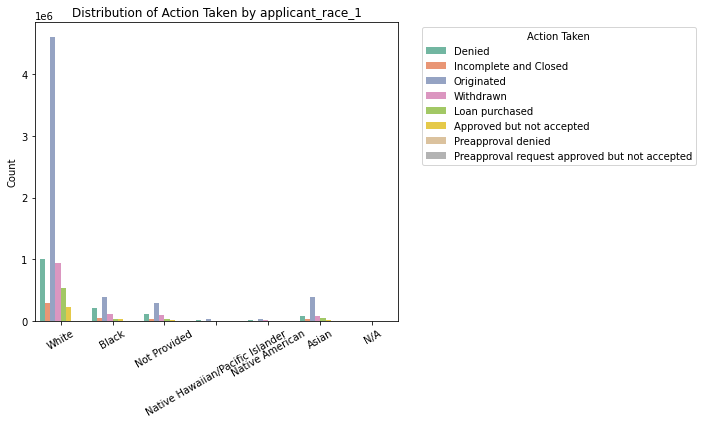

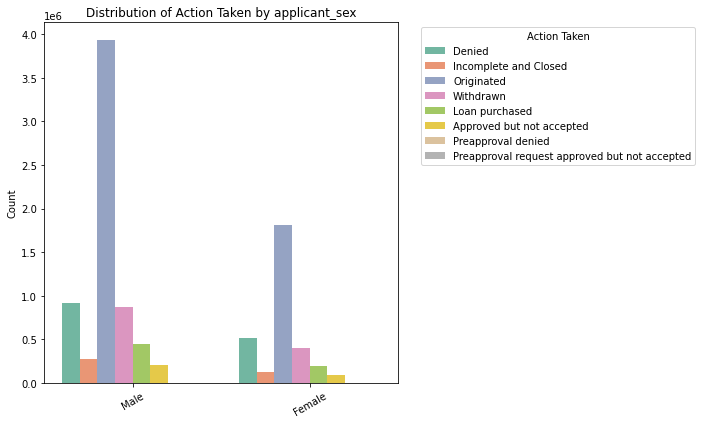

In [9]:
sensitive_subgroups = ['applicant_race_1', 'applicant_sex']
for subgroup in sensitive_subgroups:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df_cleaned, x=subgroup, hue='action_taken', palette='Set2')
    plt.title(f'Distribution of Action Taken by {subgroup}')
    plt.xlabel('')
    plt.ylabel('Count')
    plt.xticks(rotation=30)
    plt.legend(title='Action Taken', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

In Figure 4: Distribution of Action Taken by applicant_race_1, we compare the white population with the black population, to better study how race factors influence the approval/denial of a loan. For white people, the number of originated loans is more than 4 times as large as those who are denied, withdrawn, etc. By comparison, although the largest group of black people is also "originated", the difference on amount of people being approved and those who are denied and withdrawn is very small. The figure reflects that race may bring bias in the credit and loan algorithm. Seeing a significantly larger amount of approved cases in the white population than in other populations also further confirms our hypothesis that white people may be more likely to receive approval in the system. However, since there is a population difference between race groups, we will further evaluate the connections of race and action taken in future steps.

In Figure 5: Distribution of Action Taken by applicant_sex, we compare the male population with the female population, to better study how gender factors influence the approval/denial of a loan. For male people, the number of originated loans is about 4 times as large as those who are denied, withdrawn, etc. By comparison, although the largest group of female is also "originated", the difference on amount of people being approved and those who are denied and withdrawn is very small. The figure reflects that gender may bring bias in the credit and loan algorithm. Seeing a significantly larger amount of approved cases in the male population than in female populations also further confirms our hypothesis that male people may be more likely to receive approval in the system. However, since there is a population difference between gender groups, we will further evaluate the connections between gender and actions taken in future steps.

Text(0.5, 1.0, 'Correlation Heatmap')

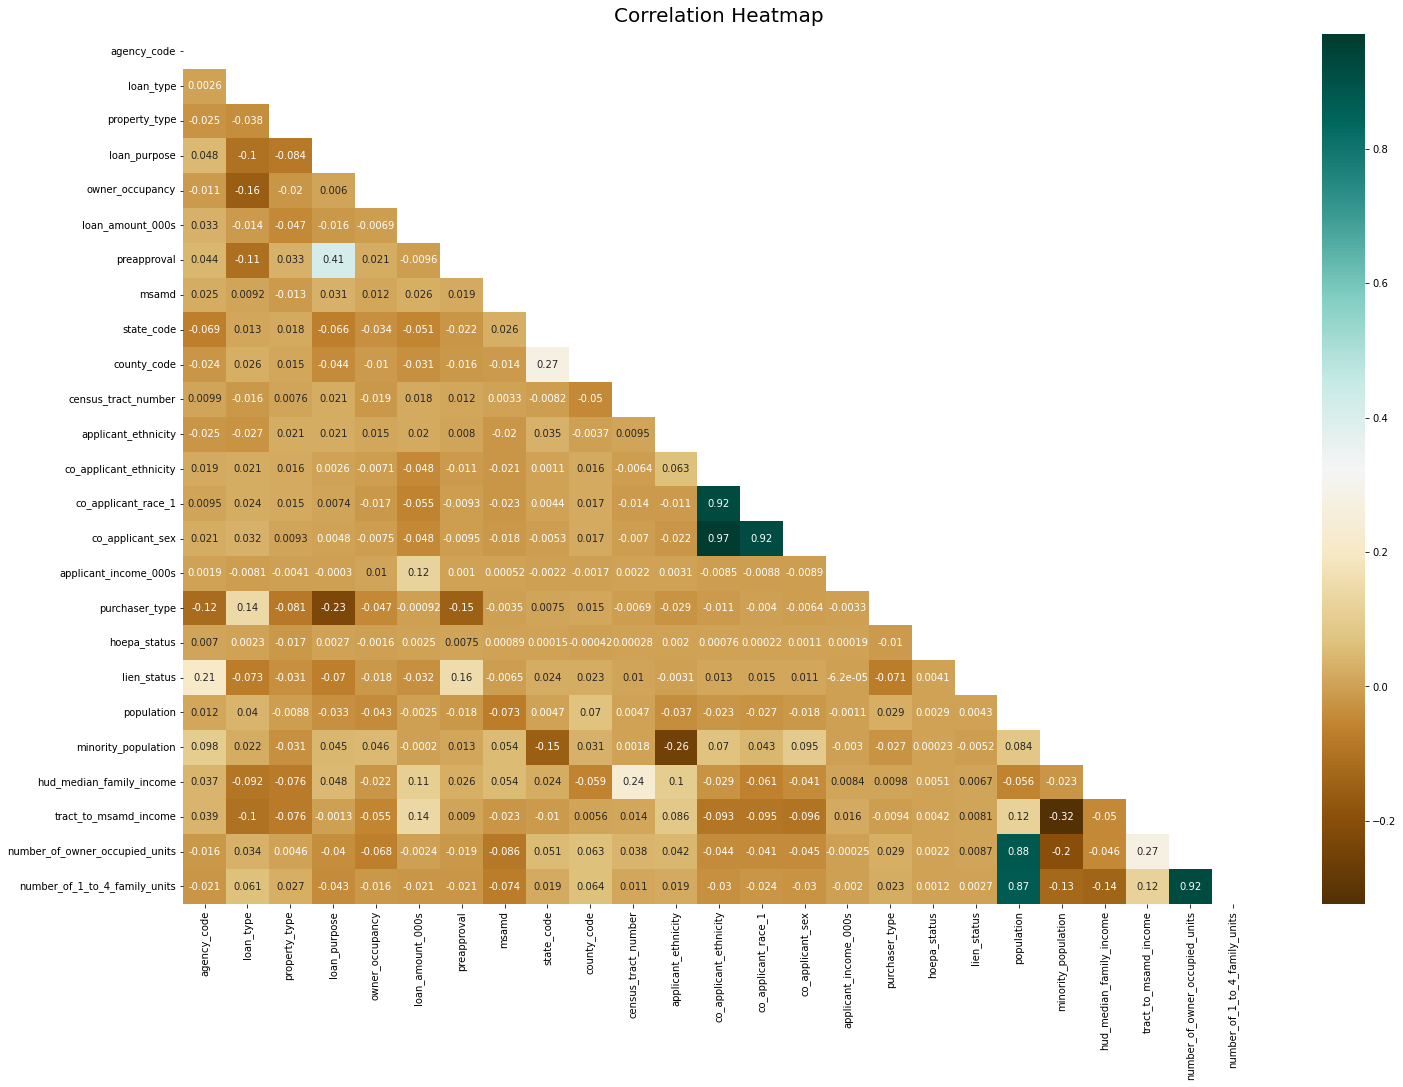

In [10]:
plt.figure(figsize=(24, 16))
mask = np.triu(np.ones_like(df_cleaned.corr(), dtype=bool))
heatmap = sns.heatmap(df_cleaned.corr(), cmap='BrBG', mask = mask, annot = True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':20}, pad=12)

In Figure 6: Correlation Heatmap, we compare and evaluate the correlation of factors in the dataset. Seeing the lines of input variables such as applicant_sex, and applicant_race_1, there is no strong correlation of these factors with others (all correlations <0.2). Seeing the output variable of interest, action_taken, the correlation of it with others is also very small (all <=0.2). The strongest correlation we observe is between co_applicant_sex and co_applicant_ethinicity at 0.97, co_applicant_race_1 with co_applicant_ethinicity at 0.92, co_applicant_sex and co_applicant_race_1 at 0.92, and number_of_1_to_4_family_unit and number_of_owner_occupied_units at 0.92. They reflect the connections of gender, race, and ethnicity of co-applicants. The correlation factors, reflecting the connections of factors, can better guide us in evaluating the reason for approval/denial.

## 5. Modeling

## 6. Results

## 7. Conclusions & Limitations

## 8. Contribution Notes

## 9. Sources cited

[1] Investopedia. 5 Steps to Scoring a Mortgage. Article. Retrieved from https://www.investopedia.com/articles/mortgages-real-estate/08/mortgage-candidate.asp \
[2] Lee, J.Y. and Yang, J. 2023. Leveraging gender proxies can lead to fairer credit risk predictions, SSRN Electronic Journal. doi:10.2139/ssrn.4602450. \
[3] Kelly, S. and Mirpourian, M. 2021. Algorithmic Bias, Financial Inclusion, and Gender. Women’s World Banking Report. Women’s World Banking. Retrieved February 19, 2024 from: https://www.womensworldbanking.org/wp-content/uploads/2021/02/2021_Algorithmic_Bias_Report.pdf. \
[4] Consumer Financial Protection Bureau, February 9, 2023. Reportable HMDA Data: A Regulatory and Reporting Overview Reference Chart for
HMDA Data Collected in 2023. Retrieved April 11, 2024 from: https://files.consumerfinance.gov/f/documents/cfpb_reportable-hmda-data_regulatory-and-reporting-overview-reference-chart_2023-02.pdf. \
[5] Consumer Financial Protection Bureau, January 1, 2024. 12 CFR Part 1003 - Home Mortgage Disclosure (Regulation C). Retrieved April 11, 2024 from: https://www.consumerfinance.gov/rules-policy/regulations/1003/. \
[6] Federal Trade Commission, July 2022. How To Comply with the Privacy of Consumer Financial Information Rule of the Gramm-Leach-Bliley Act. Retrieved April 11, 2024 from:https://www.ftc.gov/business-guidance/resources/how-comply-privacy-consumer-financial-information-rule-gramm-leach-bliley-act#obligations. \
[7] Consumer Finance Protection Bureau, 2018. Download HMDA data. Retrieved April 11, 2024 from:https://www.consumerfinance.gov/data-research/hmda/historic-data/?geo=nationwide&records=all-records&field_descriptions=codes.